In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
monthly= pd.read_csv('../data/Case Count by Month 2010-2023.csv')

In [3]:
monthly

,Year,Cases,Onset Month
0,2010,551,January
1,2010,440,February
2,2010,714,March
3,2010,1160,April
4,2010,2298,May
...,...,...,...
163,2023,558,August
164,2023,229,September
165,2023,212,October
166,2023,125,November


In [4]:
monthly['Date']= pd.to_datetime(monthly['Onset Month'] + ' ' + monthly['Year'].astype(str)).dt.to_period('M')

C:\Users\dzapa\AppData\Local\Temp\ipykernel_36992\1290844829.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly['Date']= pd.to_datetime(monthly['Onset Month'] + ' ' + monthly['Year'].astype(str)).dt.to_period('M')


In [5]:
monthly

,Year,Cases,Onset Month,Date
0,2010,551,January,2010-01
1,2010,440,February,2010-02
2,2010,714,March,2010-03
3,2010,1160,April,2010-04
4,2010,2298,May,2010-05
...,...,...,...,...
163,2023,558,August,2023-08
164,2023,229,September,2023-09
165,2023,212,October,2023-10
166,2023,125,November,2023-11


In [6]:
cases_by_month = monthly[['Date','Cases']]
cases_by_month

,Date,Cases
0,2010-01,551
1,2010-02,440
2,2010-03,714
3,2010-04,1160
4,2010-05,2298
...,...,...
163,2023-08,558
164,2023-09,229
165,2023-10,212
166,2023-11,125


In [7]:
avg_temps = pd.read_csv('../data/average US temps by month 2010-2023.csv')

In [8]:
avg_temps

,Date,Value
0,201001,30.67
1,201002,31.80
2,201003,43.56
3,201004,53.24
4,201005,59.86
...,...,...
163,202308,74.35
164,202309,67.75
165,202310,56.03
166,202311,44.22


In [9]:
avg_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    168 non-null    int64  
 1   Value   168 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [10]:
avg_temps['Date']=avg_temps['Date'].astype(str)

In [11]:
avg_temps['Date']= pd.to_datetime(avg_temps['Date'], format='%Y%m')


In [12]:
avg_temps['Date']= avg_temps['Date'].dt.to_period('M')

In [13]:
avg_temps.columns=['Month','Avg_Temp']

In [14]:
cases_by_month

,Date,Cases
0,2010-01,551
1,2010-02,440
2,2010-03,714
3,2010-04,1160
4,2010-05,2298
...,...,...
163,2023-08,558
164,2023-09,229
165,2023-10,212
166,2023-11,125


In [15]:
avg_temps

,Month,Avg_Temp
0,2010-01,30.67
1,2010-02,31.80
2,2010-03,43.56
3,2010-04,53.24
4,2010-05,59.86
...,...,...
163,2023-08,74.35
164,2023-09,67.75
165,2023-10,56.03
166,2023-11,44.22


In [16]:
cases_vs_temp=pd.merge(avg_temps, cases_by_month, left_on='Month', right_on='Date')

In [17]:
cases_vs_temp= cases_vs_temp.drop(columns=['Date'])
cases_vs_temp

,Month,Avg_Temp,Cases
0,2010-01,30.67,551
1,2010-02,31.80,440
2,2010-03,43.56,714
3,2010-04,53.24,1160
4,2010-05,59.86,2298
...,...,...,...
163,2023-08,74.35,558
164,2023-09,67.75,229
165,2023-10,56.03,212
166,2023-11,44.22,125


In [18]:
cases_vs_temp[['Avg_Temp','Cases']].corr()

,Avg_Temp,Cases
Avg_Temp,1.000000,0.671611
Cases,0.671611,1.000000


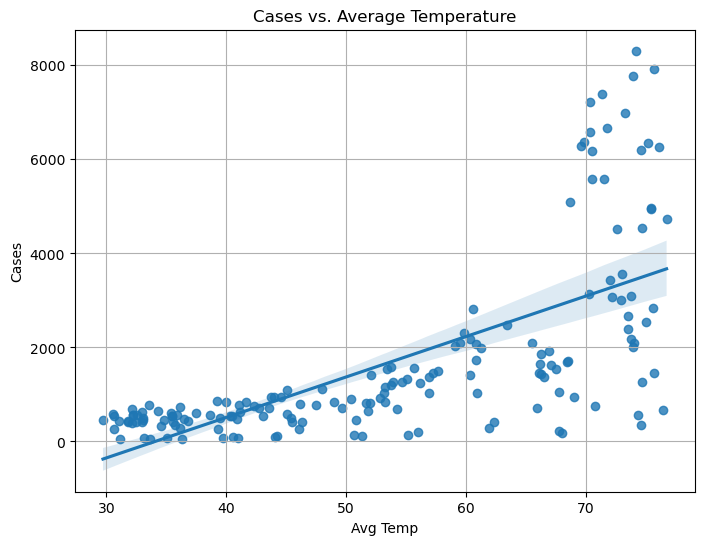

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(data=cases_vs_temp, x='Avg_Temp', y='Cases')
plt.title('Cases vs. Average Temperature')
plt.xlabel('Avg Temp')
plt.ylabel('Cases')
plt.grid(True)
plt.show()

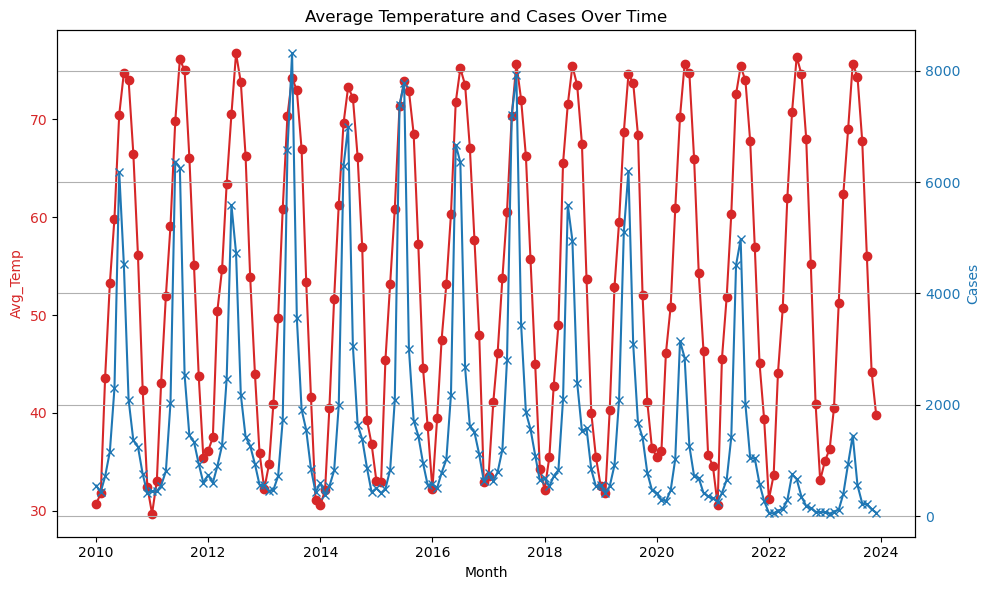

In [20]:
cases_vs_temp = cases_vs_temp.sort_values('Month')
x = cases_vs_temp['Month'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis for Avg_temp
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg_Temp', color='tab:red')
ax1.plot(x, cases_vs_temp['Avg_Temp'], color='tab:red', marker='o', label='Avg Temp')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Second axis for Cases
ax2 = ax1.twinx()
ax2.set_ylabel('Cases', color='tab:blue')
ax2.plot(x, cases_vs_temp['Cases'], color='tab:blue', marker='x', label='Cases')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Average Temperature and Cases Over Time')
plt.grid(True)
fig.tight_layout()
plt.show()

In [21]:
winter_temps = pd.read_csv('../data/average US temps winter 1996-2023.csv')

In [22]:
winter_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    28 non-null     int64  
 1   Value   28 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 580.0 bytes


In [23]:
winter_temps

,Date,Value
0,199602,32.94
1,199702,33.31
2,199802,35.90
3,199902,36.27
4,200002,36.48
5,200102,31.26
6,200202,35.66
7,200302,33.56
8,200402,33.07
9,200502,35.46


In [24]:
winter_temps['Date'] = winter_temps['Date'].astype(str)

In [25]:
winter_temps['Winter_Year'] = winter_temps['Date'].str[:4].astype(int)

In [26]:
winter_temps['Winter_Year'] = pd.PeriodIndex(winter_temps['Winter_Year'], freq='Y')

In [27]:
winter_temps= winter_temps[['Winter_Year','Value']]

In [28]:
winter_temps

,Winter_Year,Value
0,1996,32.94
1,1997,33.31
2,1998,35.90
3,1999,36.27
4,2000,36.48
5,2001,31.26
6,2002,35.66
7,2003,33.56
8,2004,33.07
9,2005,35.46


In [29]:
winter_temps.columns=['Winter_Year','Avg_Temp']

In [30]:
winter_temps

,Winter_Year,Avg_Temp
0,1996,32.94
1,1997,33.31
2,1998,35.90
3,1999,36.27
4,2000,36.48
5,2001,31.26
6,2002,35.66
7,2003,33.56
8,2004,33.07
9,2005,35.46


In [31]:
US_casecounts= pd.read_csv('../data/Overall US Case Count by Year 1996-2023.csv')

In [32]:
US_casecounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    28 non-null     int64
 1   Cases   28 non-null     int64
dtypes: int64(2)
memory usage: 580.0 bytes


In [33]:
US_casecounts['Year'] = pd.PeriodIndex(US_casecounts['Year'], freq='Y')

In [34]:
US_casecounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Year    28 non-null     period[Y-DEC]
 1   Cases   28 non-null     int64        
dtypes: int64(1), period[Y-DEC](1)
memory usage: 580.0 bytes


In [35]:
US_casecounts.head(1)

,Year,Cases
0,1996,16455


In [36]:
winter_case_counts = pd.merge(winter_temps, US_casecounts, left_on='Winter_Year', right_on='Year')

In [37]:
winter_case_counts.head(2)

,Winter_Year,Avg_Temp,Year,Cases
0,1996,32.94,1996,16455
1,1997,33.31,1997,12801


In [38]:
winter_case_counts= winter_case_counts.drop(columns='Year')

In [39]:
winter_case_counts.head()

,Winter_Year,Avg_Temp,Cases
0,1996,32.94,16455
1,1997,33.31,12801
2,1998,35.90,16801
3,1999,36.27,16273
4,2000,36.48,17730


In [40]:
winter_case_counts[['Avg_Temp','Cases']].corr()

,Avg_Temp,Cases
Avg_Temp,1.000000,0.025675
Cases,0.025675,1.000000


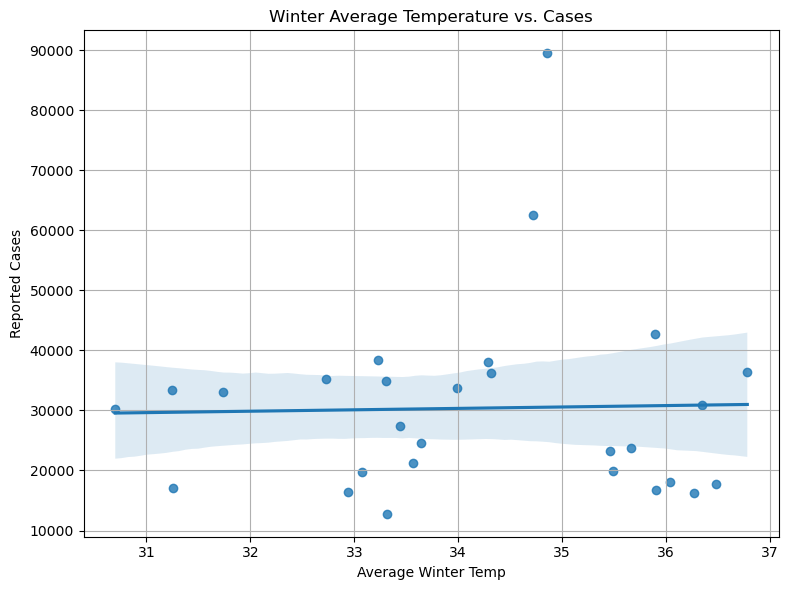

In [41]:
plt.figure(figsize=(8, 6))
sns.regplot(data=winter_case_counts, x='Avg_Temp', y='Cases')
plt.title('Winter Average Temperature vs. Cases')
plt.xlabel('Average Winter Temp')
plt.ylabel('Reported Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

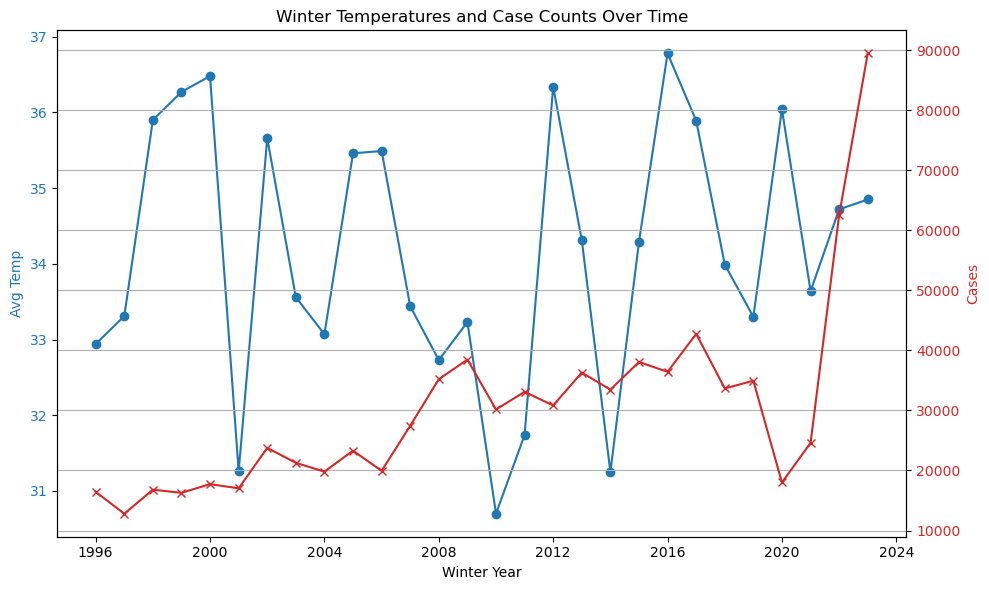

In [42]:

x = winter_case_counts['Winter_Year'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Winter Year')
ax1.set_ylabel('Avg Temp', color='tab:blue')
ax1.plot(x, winter_case_counts['Avg_Temp'], marker='o', color='tab:blue', label='Avg Temp')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.set_ylabel('Cases', color='tab:red')
ax2.plot(x, winter_case_counts['Cases'], marker='x', color='tab:red', label='Cases')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Winter Temperatures and Case Counts Over Time')
plt.grid(True)
fig.tight_layout()
plt.show()

In [43]:
summer_temps = pd.read_csv('../data/average US temps summer 1996-2023.csv')

In [44]:
summer_temps.head(1)

,Date,Value
0,199608,69.21


In [45]:
summer_temps['Date'] = summer_temps['Date'].astype(str)

In [46]:
summer_temps['Summer_Year'] = summer_temps['Date'].str[:4].astype(int)

In [47]:
summer_temps['Summer_Year'] = pd.PeriodIndex(summer_temps['Summer_Year'], freq='Y')

In [48]:
summer_temps = summer_temps[['Summer_Year','Value']]

In [49]:
summer_temps.columns=['Summer_Year','Avg_Temp']

In [50]:
summer_temps.head(1)

,Summer_Year,Avg_Temp
0,1996,69.21


In [51]:
summer_case_counts = pd.merge(summer_temps, US_casecounts, left_on='Summer_Year', right_on='Year')

In [52]:
summer_case_counts=summer_case_counts.drop(columns='Year')

In [53]:
summer_case_counts.head(3)

,Summer_Year,Avg_Temp,Cases
0,1996,69.21,16455
1,1997,68.14,12801
2,1998,70.00,16801


In [54]:
summer_case_counts[['Avg_Temp','Cases']].corr()

,Avg_Temp,Cases
Avg_Temp,1.000000,0.261888
Cases,0.261888,1.000000


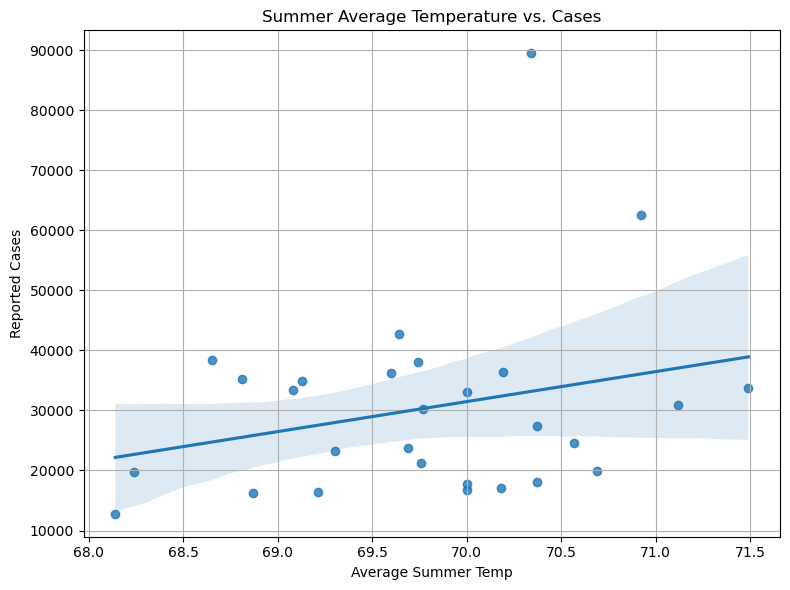

In [55]:
plt.figure(figsize=(8, 6))
sns.regplot(data=summer_case_counts, x='Avg_Temp', y='Cases')
plt.title('Summer Average Temperature vs. Cases')
plt.xlabel('Average Summer Temp')
plt.ylabel('Reported Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
regional_cases = pd.read_csv('../data/regional case counts 2010-2023.csv')

In [57]:
Northeast = regional_cases.loc[(regional_cases['Region']=='New England') | (regional_cases['Region']=='Middle Atlantic')]

In [58]:
Northeast= Northeast.reset_index(drop=True)

In [59]:
Northeast = Northeast.groupby('Year')['Cases'].sum().reset_index()

<Axes: xlabel='Year'>

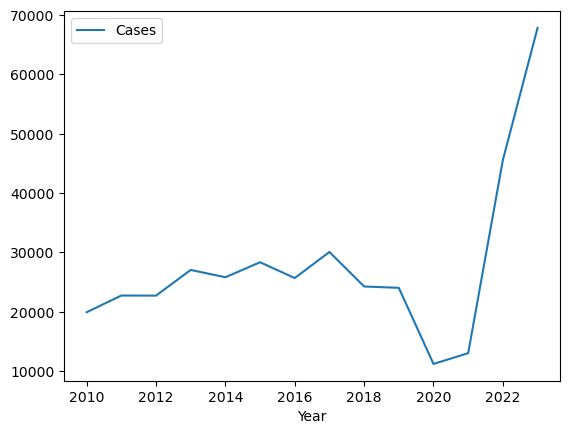

In [60]:
Northeast.plot(kind='line',x='Year', y='Cases')

In [61]:
Northeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    14 non-null     int64
 1   Cases   14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [62]:
NE_winter = pd.read_csv('../data/Northeast winter temps.csv')

In [63]:
NE_winter

,Date,Value
0,201002,25.5
1,201102,23.1
2,201202,30.0
3,201302,27.6
4,201402,22.1
5,201502,20.8
6,201602,30.7
7,201702,29.5
8,201802,25.3
9,201902,25.6


In [64]:
NE_winter['Date'] = NE_winter['Date'].astype(str)

In [65]:
NE_winter['Date'] = NE_winter['Date'].str[:4].astype(int)

In [66]:
NE_winter.columns=['Year','Avg_Temp']

<Axes: xlabel='Year'>

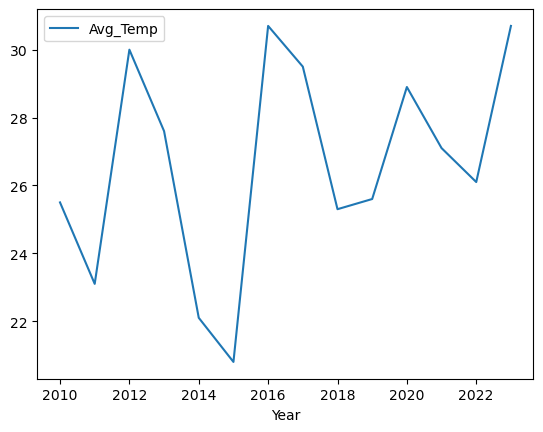

In [67]:
NE_winter.plot(kind='line',x='Year', y='Avg_Temp')

In [68]:
NE_winter.head(5)

,Year,Avg_Temp
0,2010,25.5
1,2011,23.1
2,2012,30.0
3,2013,27.6
4,2014,22.1


In [69]:
Northeast.head(5)

,Year,Cases
0,2010,19900
1,2011,22716
2,2012,22702
3,2013,27031
4,2014,25801


In [70]:
NE_case_temp = pd.merge(NE_winter,Northeast,on='Year')

In [100]:
NE_case_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14 non-null     int64  
 1   Avg_Temp  14 non-null     float64
 2   Cases     14 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 468.0 bytes


In [71]:
NE_case_temp[['Avg_Temp','Cases']].corr()

,Avg_Temp,Cases
Avg_Temp,1.000000,0.225021
Cases,0.225021,1.000000


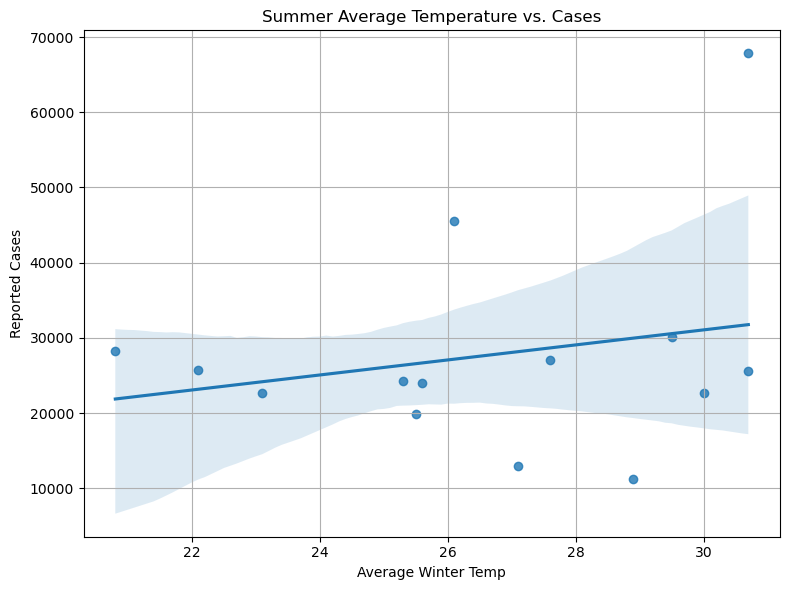

In [72]:
plt.figure(figsize=(8, 6))
sns.regplot(data=NE_case_temp, x='Avg_Temp', y='Cases')
plt.title('Summer Average Temperature vs. Cases')
plt.xlabel('Average Winter Temp')
plt.ylabel('Reported Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
ohio_winter = pd.read_csv('../data/Ohio winter temps.csv')

In [74]:
ohio_winter

,Date,Value
0,200802,30.2
1,200902,27.7
2,201002,27.1
3,201102,26.3
4,201202,34.7
5,201302,32.5
6,201402,25.1
7,201502,25.7
8,201602,34.8
9,201702,35.4


In [75]:
ohio_winter['Date'] = ohio_winter['Date'].astype(str)

In [76]:
ohio_winter['Date'] = ohio_winter['Date'].str[:4].astype(int)

In [77]:
ohio_winter.columns=['Year','Avg_Temp']

In [78]:
ohio_winter

,Year,Avg_Temp
0,2008,30.2
1,2009,27.7
2,2010,27.1
3,2011,26.3
4,2012,34.7
5,2013,32.5
6,2014,25.1
7,2015,25.7
8,2016,34.8
9,2017,35.4


In [79]:
state_cases= pd.read_csv('../data/Case Count by State 2008-2023.csv')

In [80]:
Ohio =state_cases.loc[state_cases['State']=='Ohio']
Ohio

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
34,Ohio,45,58,44,53,67,93,119,154,160,270,293,467,409,590,553,"1,307"


In [85]:
Ohio = pd.melt(Ohio, id_vars=['State'], var_name='Year', value_name='Value')

In [88]:
Ohio=Ohio[['Year','Value']]

In [89]:
Ohio.columns=['Year','Case_Count']

In [90]:
Ohio

,Year,Case_Count
0,2008,45
1,2009,58
2,2010,44
3,2011,53
4,2012,67
5,2013,93
6,2014,119
7,2015,154
8,2016,160
9,2017,270


In [91]:
Ohio['Year']=Ohio['Year'].astype(int)

C:\Users\dzapa\AppData\Local\Temp\ipykernel_36992\327607044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ohio['Year']=Ohio['Year'].astype(int)


In [92]:
Ohio

,Year,Case_Count
0,2008,45
1,2009,58
2,2010,44
3,2011,53
4,2012,67
5,2013,93
6,2014,119
7,2015,154
8,2016,160
9,2017,270


In [94]:
Ohio_case_wintertemp= pd.merge(ohio_winter, Ohio,on='Year')

In [103]:
Ohio_case_wintertemp['Case_Count'] = pd.to_numeric(Ohio_case_wintertemp['Case_Count'].str.replace(',', ''), errors='coerce')

In [104]:
Ohio_case_wintertemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        16 non-null     int64  
 1   Avg_Temp    16 non-null     float64
 2   Case_Count  16 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 516.0 bytes


In [105]:
Ohio_case_wintertemp[['Avg_Temp','Case_Count']].corr()

,Avg_Temp,Case_Count
Avg_Temp,1.000000,0.472377
Case_Count,0.472377,1.000000


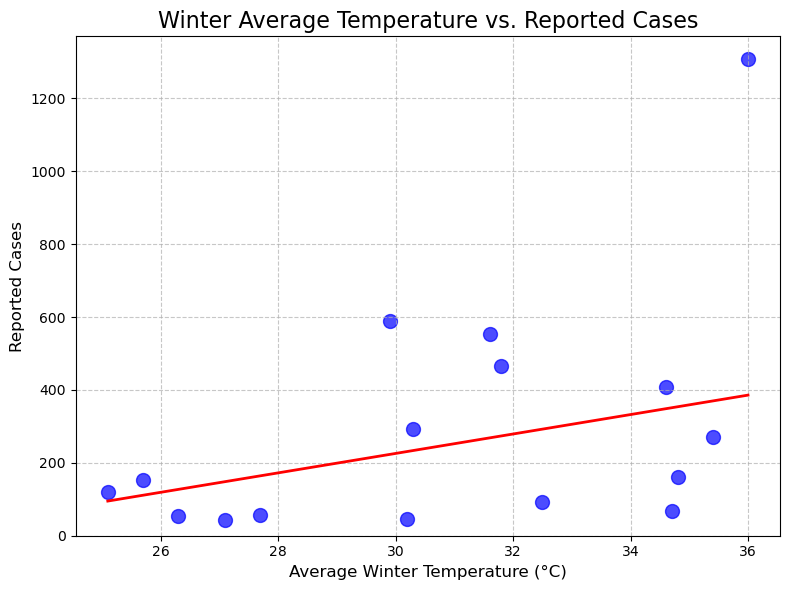

In [108]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=Ohio_case_wintertemp,
    x='Avg_Temp',
    y='Case_Count',
    scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.7}, 
    line_kws={'color': 'red', 'linewidth': 2}, 
    ci=None,  
    robust=True 
)


plt.ylim(bottom=0)


plt.title('Winter Average Temperature vs. Reported Cases', fontsize=16)
plt.xlabel('Average Winter Temperature (°C)', fontsize=12)
plt.ylabel('Reported Cases', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()